In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import pickle
import obspy
from scipy.signal import find_peaks
import os
import pandas as pd

from sklearn.mixture import GaussianMixture
from scipy.stats import norm
from scipy.optimize import curve_fit

In [2]:
combined = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/combined.csv')

In [3]:
window = 2

In [4]:
def get_stf(scardec_name, wanted_type = 'fctopt'):
    db = combined[combined['scardec_name']==scardec_name]

    time = []
    momentrate = []

    event = os.listdir(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}')
    starts = [n for n, l in enumerate(event) if l.startswith(wanted_type)]
    with open(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}/{event[starts[0]]}') as f:
        lines = f.read().splitlines()

    lines = lines[2:]
    for line in lines:
        split = line.split(' ')
        split = [s for s in split if s not in ['', ' ', '\n']]
        time.append(float(split[0]))
        momentrate.append(float(split[1]))

    momentrate = np.array(momentrate)
    return momentrate, time, db

In [25]:
bounds



([0, -inf, -inf, 0, -inf, -inf, 0, -inf, -inf, 0, -inf, -inf],
 [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf])

In [6]:
# time = np.array(time)
# momentrate = np.array(momentrate)

FCTs_20170818_025925_NORTH_OF_ASCENSION_ISLAND
Gaussian 1 - Amplitude: 1.538910102117972, Mean: 17.307934913686616, Standard Deviation: 1.7971586435378577
R-squared: 0.6888521644581744
Proportion moment from Gaussian fit: 0.6896841828187685
Gaussian 1 - Amplitude: 1.5513259395457089, Mean: 17.326810149036472, Standard Deviation: 1.7635776202546998
R-squared: 0.9502012212134198
Gaussian 2 - Amplitude: 0.6938366163480594, Mean: 9.324578198744138, Standard Deviation: -1.5600429518191083
R-squared: 0.9502012212134198
Proportion moment from Gaussian fit: 0.9522405954033643


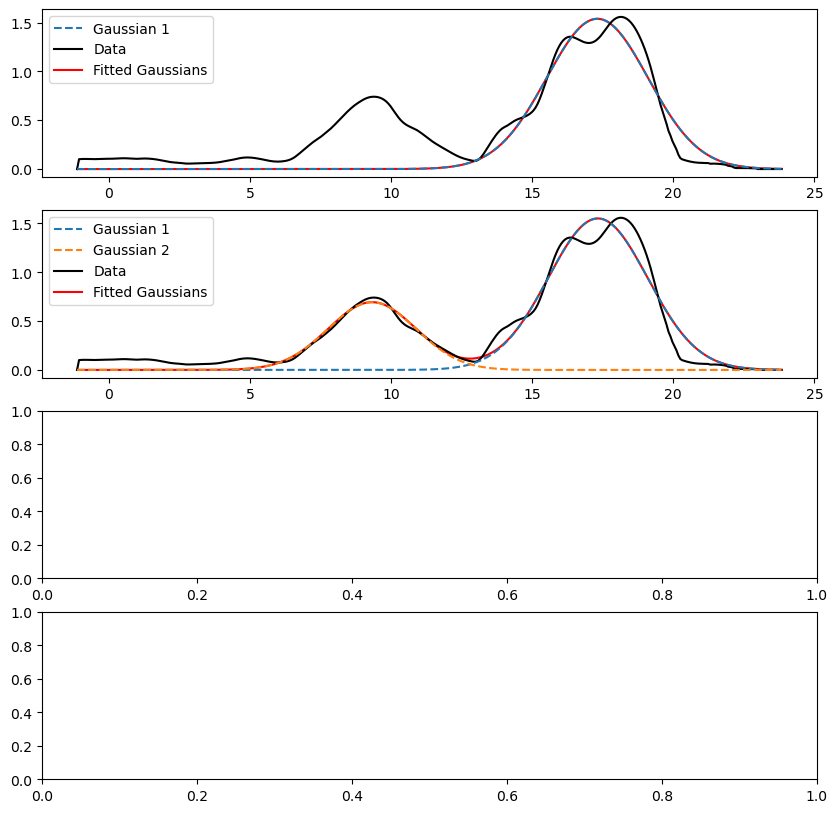

FCTs_20110126_154229_NORTHERN_SUMATRA__INDONESIA
Gaussian 1 - Amplitude: 0.3126263999002774, Mean: 7.648758946476243, Standard Deviation: 2.565646867660882
R-squared: 0.915196285802411
Proportion moment from Gaussian fit: 1.0004049759421447
Gaussian 1 - Amplitude: 0.23358237358571088, Mean: -1.0198586549944626, Standard Deviation: 0.011104311992635434
R-squared: -1.0246751477598806
Gaussian 2 - Amplitude: 0.4746065228734683, Mean: 2.2855992722490974, Standard Deviation: 0.01774385377179454
R-squared: -1.0246751477598806
Proportion moment from Gaussian fit: 0.004787521390368827
Gaussian 1 - Amplitude: 0.1678542474082204, Mean: 5.044100962679252, Standard Deviation: -1.984585146408147
R-squared: 0.9842330426971235
Gaussian 2 - Amplitude: 0.3099323218409978, Mean: 8.77145426782813, Standard Deviation: 1.5155156230880686
R-squared: 0.9842330426971235
Gaussian 3 - Amplitude: 4.853203131794044, Mean: -8.578443857273442, Standard Deviation: 0.561071919201561
R-squared: 0.9842330426971235
Prop

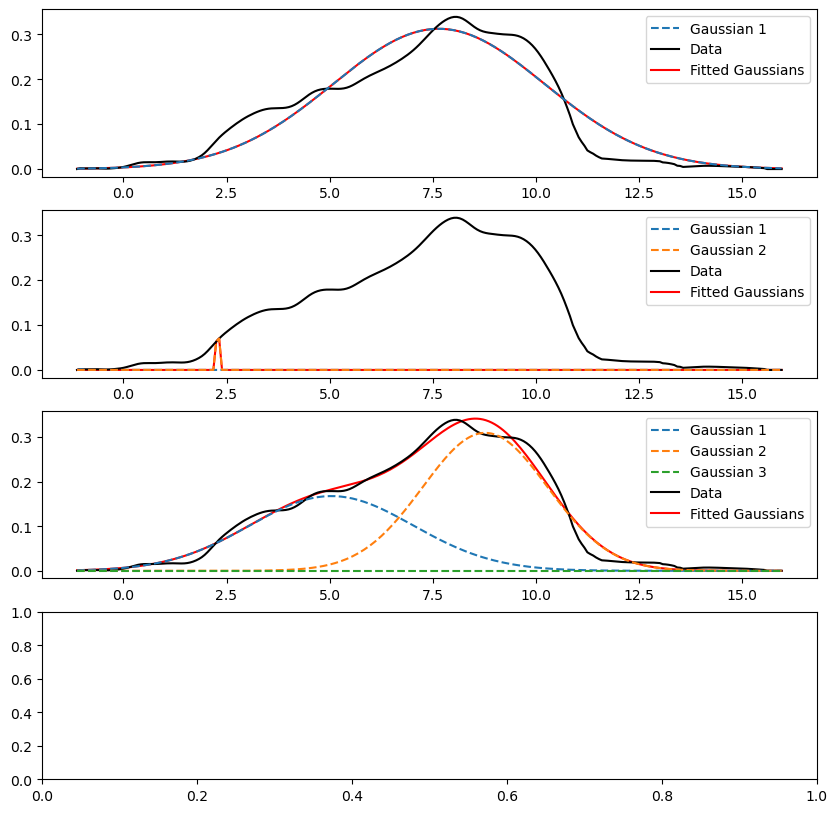

FCTs_19981010_162908_MINAHASSA_PENINSULA__SULAWESI
Gaussian 1 - Amplitude: 0.34712660967320313, Mean: 2.1026061669087164, Standard Deviation: 1.169557285948048
R-squared: 0.968222239286721
Proportion moment from Gaussian fit: 0.9999672707918494


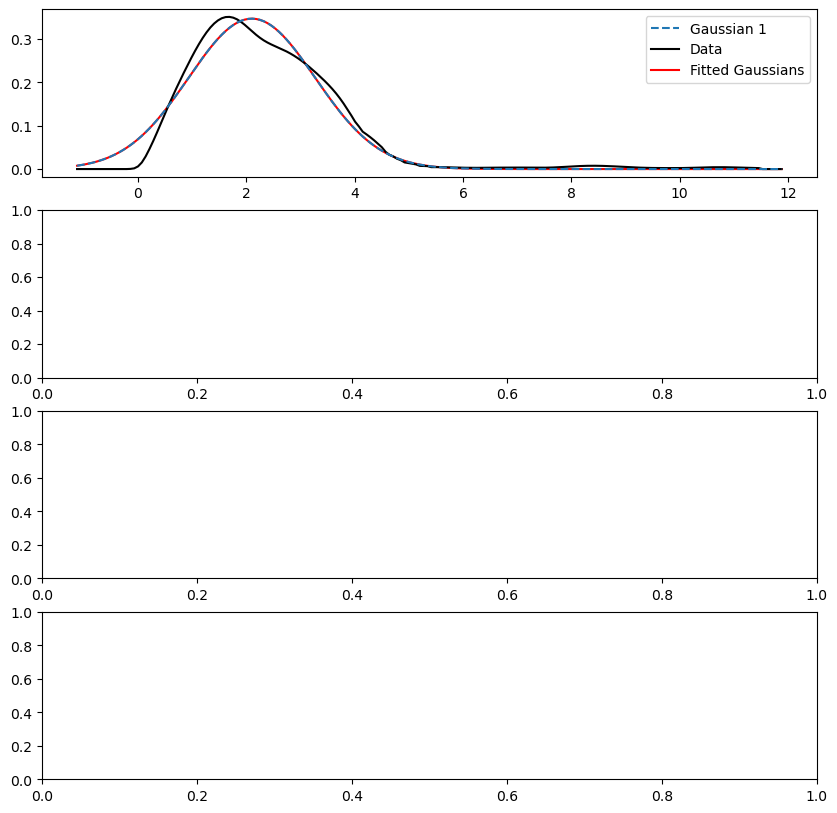

FCTs_19920730_082446_XIZANG
Gaussian 1 - Amplitude: 0.4823664160616395, Mean: 4.076686150239458, Standard Deviation: 1.1056554859910255
R-squared: 0.9706860237350626
Proportion moment from Gaussian fit: 0.9924938018928275


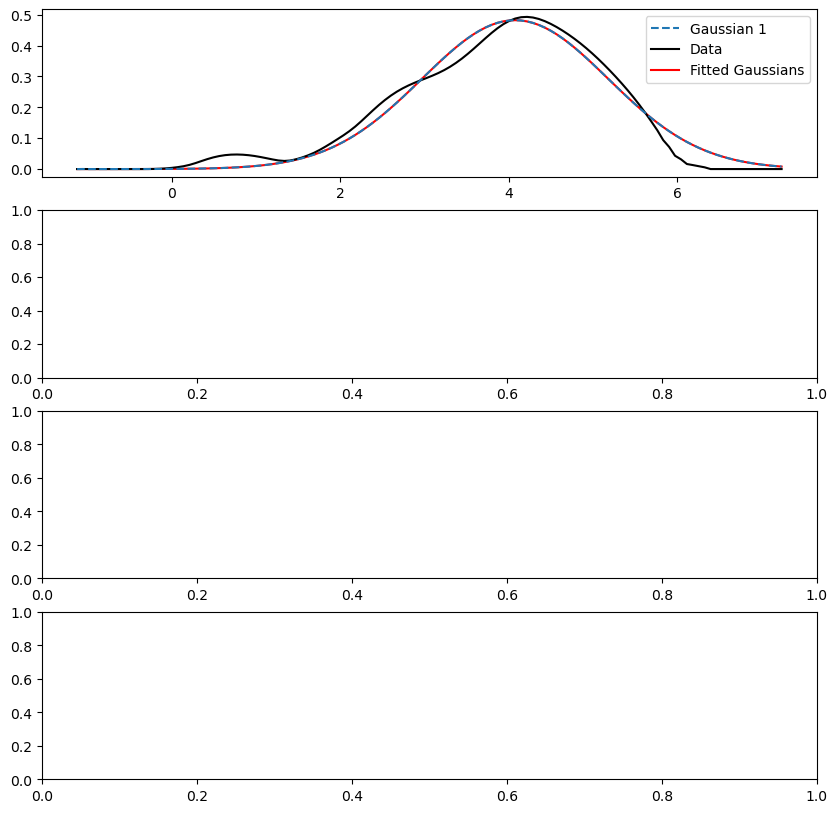

FCTs_19960327_205206_NEAR_COAST_OF_NICARAGUA
Gaussian 1 - Amplitude: 0.14656063089430948, Mean: 10.873017923939335, Standard Deviation: 6.464573640080196
R-squared: 0.4282063681166002
Proportion moment from Gaussian fit: 1.0307163830860004
Gaussian 1 - Amplitude: 0.1465589990028138, Mean: 10.873118261042734, Standard Deviation: -6.46472396674167
R-squared: 0.4282063686511085
Gaussian 2 - Amplitude: 1.3863892260496598, Mean: -1.0060224983129495, Standard Deviation: 0.0008027132936369256
R-squared: 0.4282063686511085
Proportion moment from Gaussian fit: 1.0307235006235524
Gaussian 1 - Amplitude: 0.2002423328589057, Mean: 14.856684965157294, Standard Deviation: -2.390848586539993
R-squared: 0.8815846917011241
Gaussian 2 - Amplitude: 0.12268154638598446, Mean: 5.109169945034764, Standard Deviation: 2.3924525152986735
R-squared: 0.8815846917011241
Gaussian 3 - Amplitude: 0.17790785878332524, Mean: 7.924309353343256, Standard Deviation: 0.5892525890983357
R-squared: 0.8815846917011241
Propor

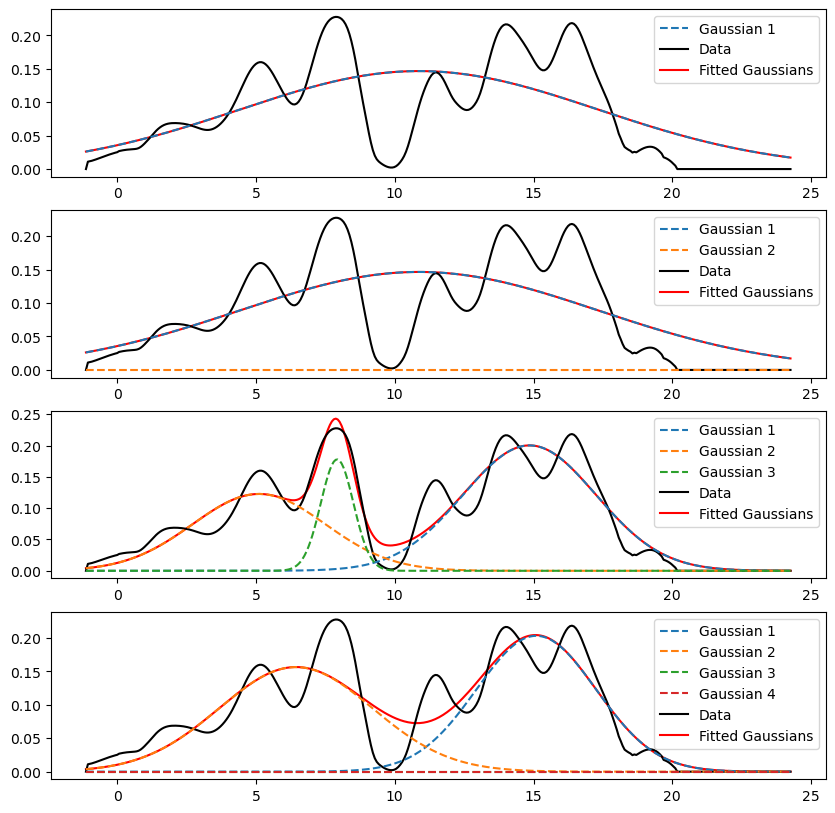

FCTs_20011012_150216_SOUTH_OF_MARIANA_ISLANDS
Gaussian 1 - Amplitude: 8.56089434066329, Mean: 2.7691615398502383, Standard Deviation: 1.3983464516704085
R-squared: 0.9337770144351034
Proportion moment from Gaussian fit: 0.8924079623810423
Gaussian 1 - Amplitude: 2.4009428125917633, Mean: 4.94826276435436, Standard Deviation: 2.02864166148425
R-squared: 0.99681934673702
Gaussian 2 - Amplitude: 7.978014533365337, Mean: 2.4471699566699607, Standard Deviation: 1.0518937732120863
R-squared: 0.99681934673702
Proportion moment from Gaussian fit: 0.9906223849186198


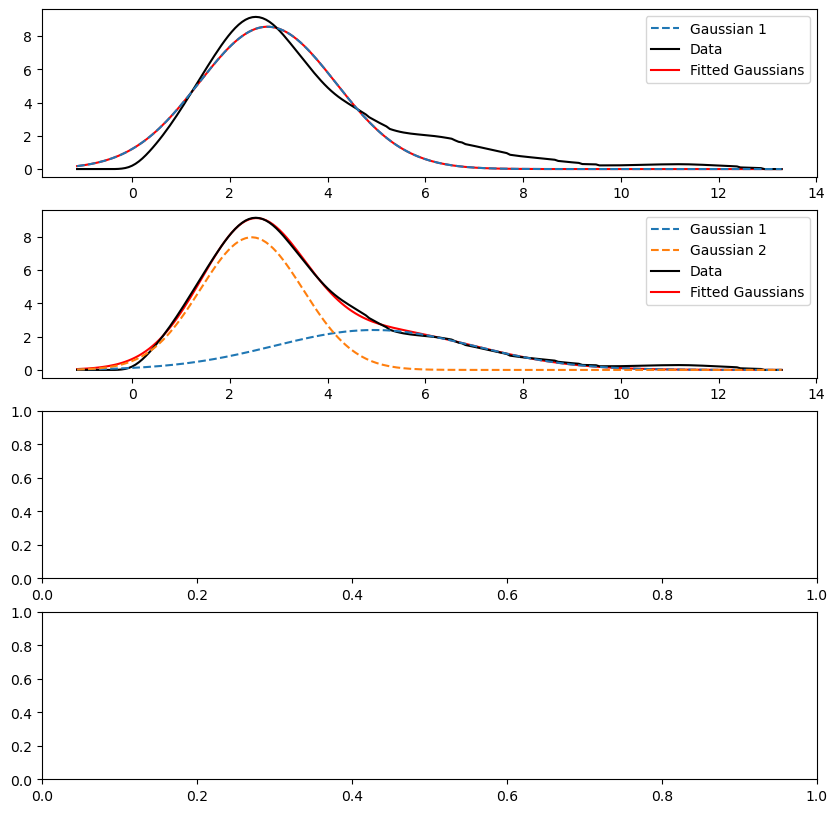

FCTs_19960212_090807_SOUTH_OF_SUMBAWA__INDONESIA
Gaussian 1 - Amplitude: 0.48411270376211885, Mean: 3.1494614468394455, Standard Deviation: 0.8577015472447357
R-squared: 0.050827798267736535
Proportion moment from Gaussian fit: 0.41839361542603637
Gaussian 1 - Amplitude: 0.24756585568060918, Mean: 11.173818315311522, Standard Deviation: 2.3076925073405743
R-squared: 0.7760227083797853
Gaussian 2 - Amplitude: 0.4857751048681946, Mean: 3.1473469837869206, Standard Deviation: 0.8462253571951197
R-squared: 0.7760227083797853
Proportion moment from Gaussian fit: 0.9868836008610433
Gaussian 1 - Amplitude: 0.041319683306410254, Mean: 1.2031873873143288, Standard Deviation: -0.23408792357018926
R-squared: 0.0887350954900421
Gaussian 2 - Amplitude: 0.17641041188652998, Mean: 6.784646373900757, Standard Deviation: 7.120445433902565
R-squared: 0.0887350954900421
Gaussian 3 - Amplitude: 0.3325813028234815, Mean: -3.3428981391358477, Standard Deviation: 0.15305461963466926
R-squared: 0.088735095490

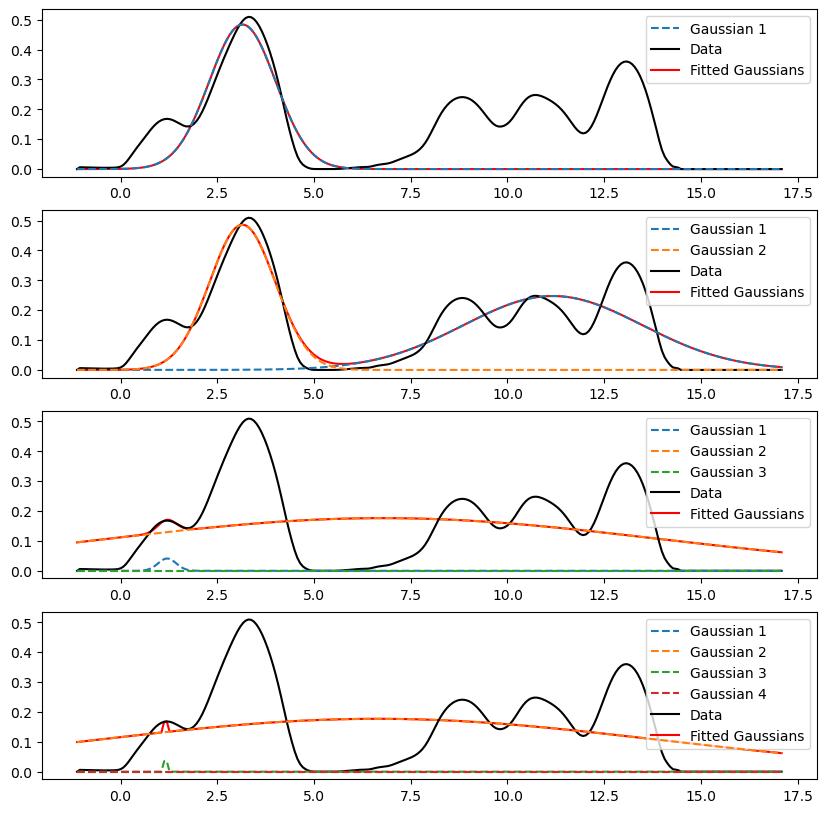

FCTs_20120320_180247_NEAR_COAST_OF_GUERRERO__MEXICO
Gaussian 1 - Amplitude: 23.194145531586916, Mean: 5.885711896879804, Standard Deviation: 2.533293604728858
R-squared: 0.9972891723908703
Proportion moment from Gaussian fit: 1.0004785289475062


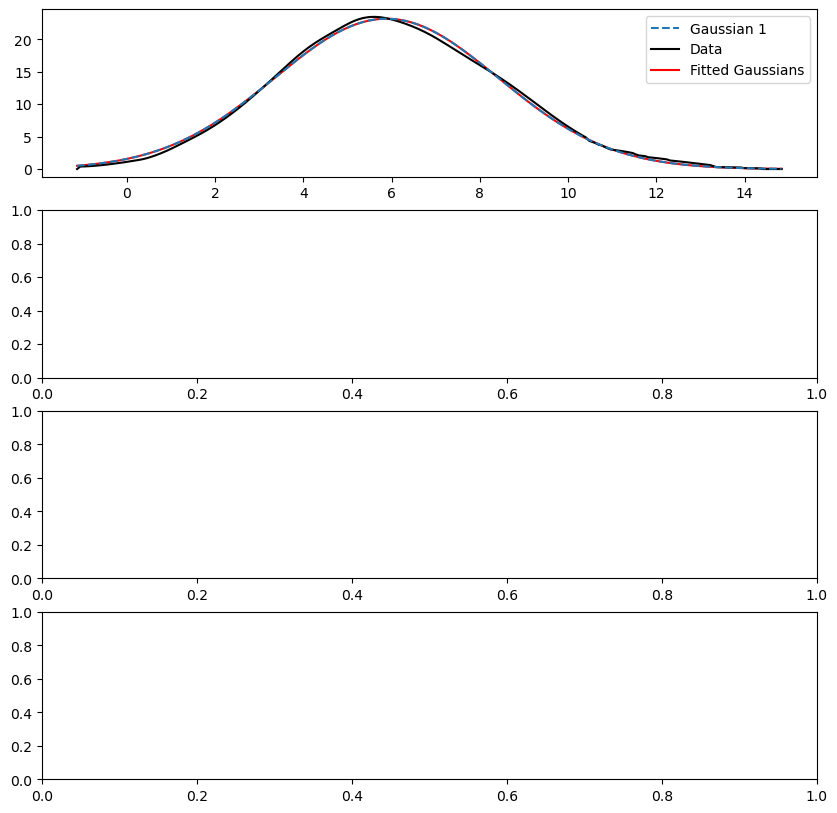

FCTs_20070402_120223_SOLOMON_ISLANDS
Gaussian 1 - Amplitude: 1.0568683115365922, Mean: 2.1079520716756655, Standard Deviation: 1.1151365084670701
R-squared: 0.958908022886425
Proportion moment from Gaussian fit: 1.019482984775704


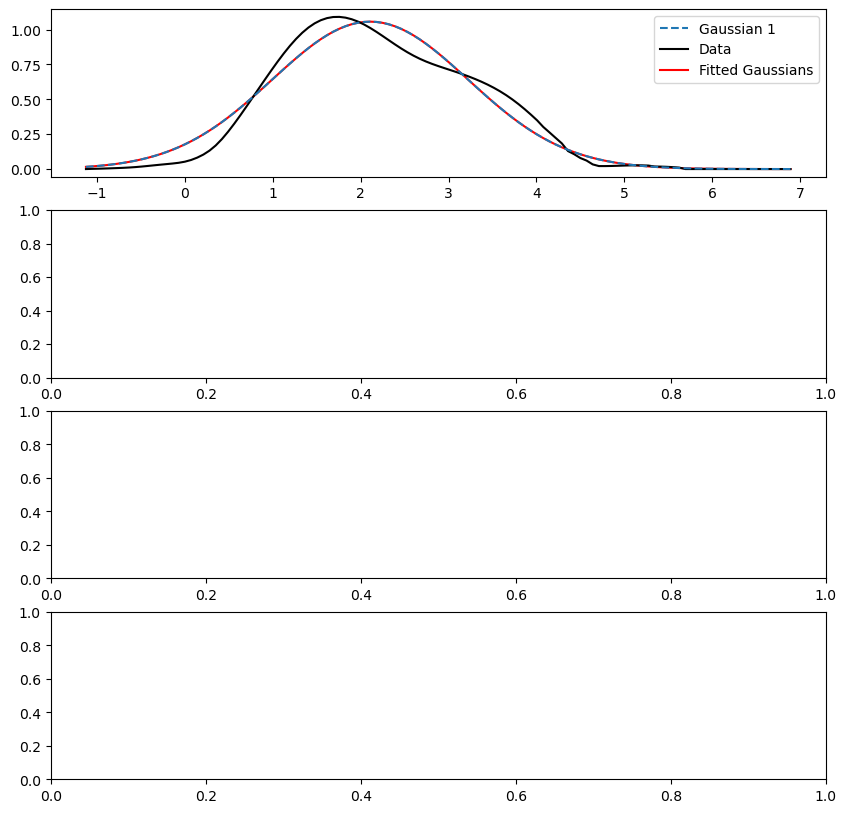

FCTs_20070427_134928_SOLOMON_ISLANDS
Gaussian 1 - Amplitude: 0.3609459338335285, Mean: 3.4272143419925305, Standard Deviation: 0.5982366850916929
R-squared: 0.9379548442619225
Proportion moment from Gaussian fit: 0.8460395035384863
Gaussian 1 - Amplitude: 0.3609452042642164, Mean: 3.4272113488968996, Standard Deviation: 0.598236136607456
R-squared: 0.9379548442525175
Gaussian 2 - Amplitude: 0.31277700913386464, Mean: 0.949232759370928, Standard Deviation: 0.0015068498236937896
R-squared: 0.9379548442525175
Proportion moment from Gaussian fit: 0.8460370177870007
Gaussian 1 - Amplitude: 0.018623160192781672, Mean: 0.8414839899509383, Standard Deviation: 0.48020019084563176
R-squared: 0.9980230302021308
Gaussian 2 - Amplitude: 0.3746381465307418, Mean: 3.3767350890255488, Standard Deviation: 0.5200418812456387
R-squared: 0.9980230302021308
Gaussian 3 - Amplitude: 0.07551895771412706, Mean: 5.126532048163289, Standard Deviation: 0.6833671114863774
R-squared: 0.9980230302021308
Proportion m

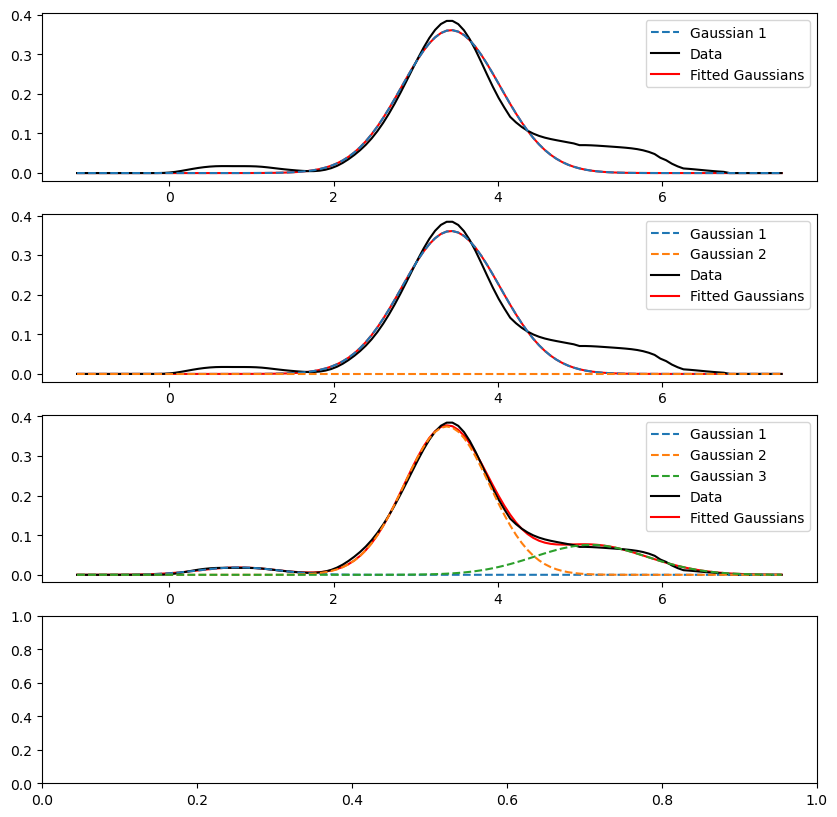

In [29]:
# Define a sum of Gaussian functions
def multi_gaussian(x, *params):
    y = np.zeros_like(x)

    for i in range(0, len(params), 3):
        amp = params[i]
        mean = params[i+1]
        stddev = params[i+2]
        y += amp * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

    return y

for scardec_name in os.listdir('/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec')[0:10]:
    print(scardec_name)

    db = combined[combined['scardec_name']==scardec_name]
    momentrate, time, db = get_stf(scardec_name, wanted_type = 'fctmoy')
    momentrate = momentrate/1e18

    not_zero = np.where(momentrate > 0)[0]

    dx = time[1]-time[0]

    start = min(not_zero)
    end = max(not_zero)
    points_before_zero = abs(min(time)/dx)

    duration = time[end] - time[start]

    start_time = time[start]
    end_time = time[end]

    total_moment = scipy.integrate.simpson(momentrate[start:end], dx = time[1]-time[0])

    fig, axs = plt.subplots(4,1, figsize=(10, 10))

    for gaussian_num in range(1, 5):
        # Initial guess for the parameters (amplitude, mean, stddev for each Gaussian)
        initial_guess = []

        for i in range(gaussian_num):
            if i < 4:
                initial_guess.extend([1, 0, 1])
            else:
                initial_guess.extend([0.01, 0, 20])

        # Fit the data
        if True:
            bounds = ([0 if i % 3 == 0 else -np.inf for i in range(len(initial_guess))],
                      [np.inf for _ in range(len(initial_guess))])  # Amplitude must be positive, mean can be negative
            popt, pcov = curve_fit(multi_gaussian,
                                   time,
                                   momentrate,
                                   p0=initial_guess,
                                   bounds=bounds,
                                   maxfev=5000)

            # Extract the parameters
            num_gaussians = len(popt) // 3
            params = []
            for i in range(num_gaussians):
                amp = popt[i*3]
                mean = popt[i*3 + 1]
                stddev = popt[i*3 + 2]
                params.append((amp, mean, stddev))
                print(f"Gaussian {i+1} - Amplitude: {amp}, Mean: {mean}, Standard Deviation: {stddev}")
                x = time
                y = amp * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))
                axs[gaussian_num-1].plot(time, y,
                                        label=f'Gaussian {i+1}',
                                        linestyle='--',
                                        zorder = 10)
                # Calculate the fit
                y_fit = multi_gaussian(time, *popt)

                # Calculate the R-squared value
                residuals = momentrate - y_fit
                ss_res = np.sum(residuals**2)
                ss_tot = np.sum((momentrate - np.mean(momentrate))**2)
                r_squared = 1 - (ss_res / ss_tot)

                print(f'R-squared: {r_squared}')
        # except Exception as e:
        #     print('Failed to fit Gaussian')
        #     print(e)
        #     continue

        # Plot the fitted Gaussians
        axs[gaussian_num-1].plot(time, momentrate,
                                label='Data',
                                linestyle='-',
                                color='black')
        axs[gaussian_num-1].plot(time, multi_gaussian(time, *popt),
                                label='Fitted Gaussians',
                                linestyle='-',
                                zorder = 1,
                                color='red')
        axs[gaussian_num-1].legend()

        moment_gaussian = scipy.integrate.simpson(multi_gaussian(time, *popt), dx = time[1]-time[0])
        # print(f'Total moment from Gaussian fit: {moment_gaussian}')
        # print(f'Total moment from data: {total_moment}')
        print(f'Proportion moment from Gaussian fit: {moment_gaussian/total_moment}')

        if r_squared > 0.95:
            break

    plt.show()
    plt.close()

NameError: name 'means' is not defined

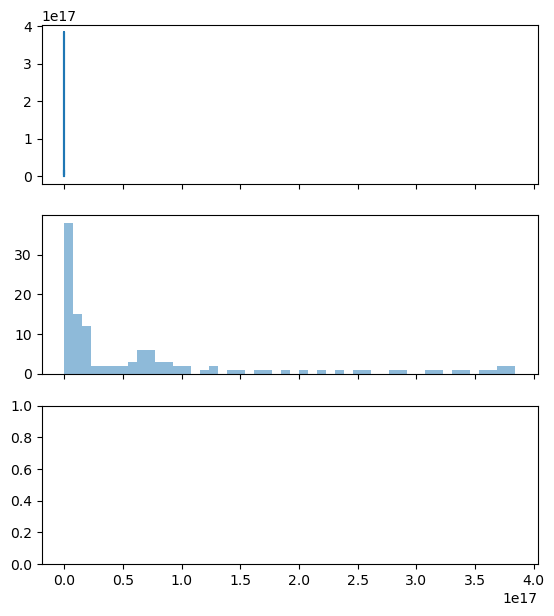

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='col', figsize=(6.4, 7))


axes[0].plot(time, momentrate)
axes[1].hist(momentrate, bins=50, alpha=0.5)

x = np.linspace(min(momentrate), max(momentrate), 100)

for mean, covariance, weight in zip(means, standard_deviations, weights):
    pdf = weight*norm.pdf(x, mean, covariance)
    plt.plot(x.reshape(-1, 1), pdf.reshape(-1, 1), alpha=0.5)

plt.show()

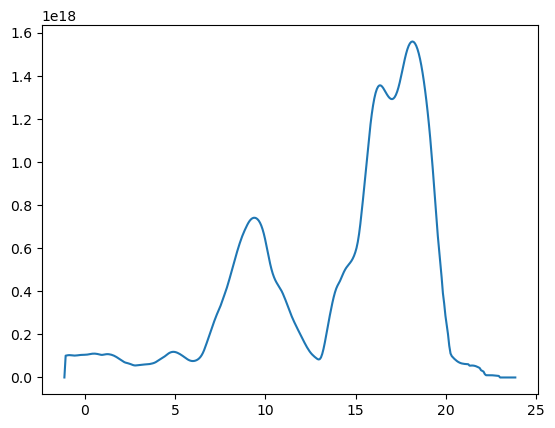

In [14]:
plt.plot(time, momentrate)

In [16]:
import numpy as np

dist_1 = np.random.normal(10, 3, 1000)
dist_2 = np.random.normal(30, 5, 4000)
dist_3 = np.random.normal(45, 6, 500)

multimodal_dist = np.concatenate((dist_1, dist_2, dist_3), axis=0)



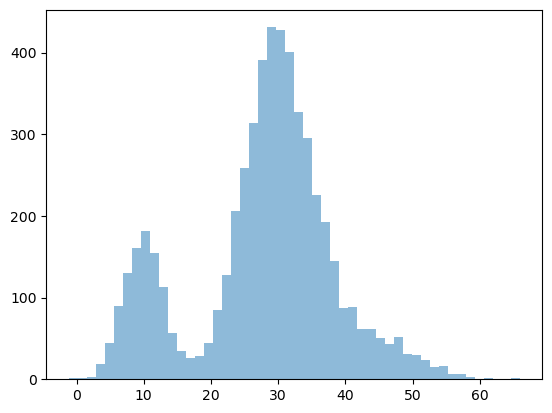

In [17]:
plt.hist(multimodal_dist, bins=50, alpha=0.5)
plt.show()

In [18]:
gmm = GaussianMixture(n_components=3)
gmm.fit(multimodal_dist.reshape(-1, 1))

means = gmm.means_

# Conver covariance into Standard Deviation
standard_deviations = gmm.covariances_**0.5

# Useful when plotting the distributions later
weights = gmm.weights_


print(f"Means: {means}, Standard Deviations: {standard_deviations}")

Means: [[39.20281604]
 [ 9.96268046]
 [29.31191537]], Standard Deviations: [[[7.64949014]]

 [[2.97909846]]

 [[4.52566586]]]


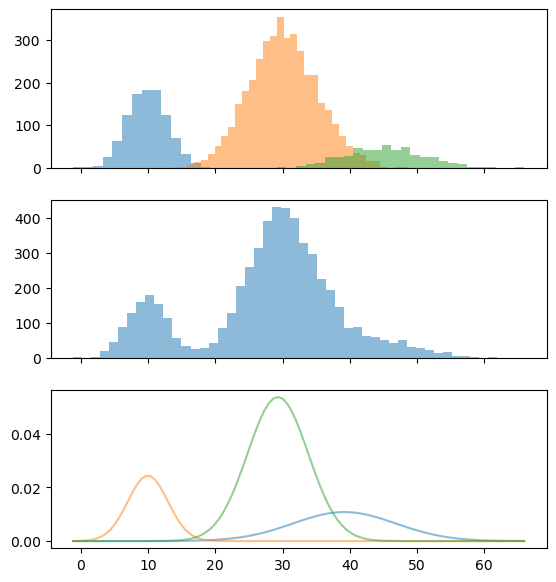

In [ ]:

fig, axes = plt.subplots(nrows=3, ncols=1, sharex='col', figsize=(6.4, 7))

for bins, dist in zip([14, 34, 26], [dist_1, dist_2, dist_3]):
    axes[0].hist(dist, bins=bins, alpha=0.5)

axes[1].hist(multimodal_dist, bins=50, alpha=0.5)

x = np.linspace(min(multimodal_dist), max(multimodal_dist), 100)

for mean, covariance, weight in zip(means, standard_deviations, weights):
    pdf = weight*norm.pdf(x, mean, covariance)
    plt.plot(x.reshape(-1, 1), pdf.reshape(-1, 1), alpha=0.5)

plt.show()